1000000000000.0 5.528060553152171e-06
100000000000.0 1.4825439690625684e-08
10000000000.0 2.339430482956403e-10
1000000000.0 1.4036735519742792e-12
100000000.0 3.265662005312722e-14
10000000.0 1.2344426824206164e-15
1000000.0 5.611103101911893e-16
100000.0 4.488882481529514e-16
10000.0 1.7955529926118057e-15
1000.0 1.312998125847383e-14
100.0 7.182211970447223e-14


KeyboardInterrupt: 

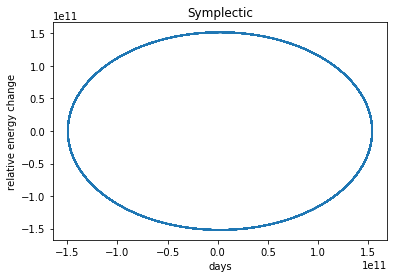

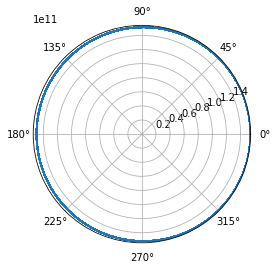

In [2]:
# symplectic
import numpy as np
import matplotlib.pyplot as plt
import math

#initialize arrays for the positions and velocities
x = []
y = []
z = []
Vx = []
Vy = []
Vz = []
r =[]
t = 0
energy = []
time = []

#initial conditions
x_val = -1.496e+11
y_val = 0
z_val = 0
Vx_val = 0
Vy_val = 30000
Vz_val = 0
h = 10000

# set the constants
mu_e = 1.989e+30 * 6.67e-11
N = 50*365.25*24*60*60

#initial energy
E = (Vy_val)**2/2 - mu_e/x_val

while t < N:
    
    r_val = np.sqrt(x_val**2 + y_val**2 + z_val**2)
    r.append(r_val)
    
    # calculating the current energy
    v_current = (x_val * Vx_val + y_val * Vy_val)/np.sqrt(x_val**2 + y_val**2)
    E_current = v_current**2/2 - mu_e/r_val
    energy.append(abs(E_current-E)/abs(E))
    
    time.append((t/(60*60*24)))
    
    Vx_val = Vx_val - h * mu_e/(r_val**3) * x_val
    x_val = x_val + h * Vx_val
    x.append(x_val)
    Vx.append(Vx_val)
    
    Vy_val = Vy_val - h * mu_e/r_val**3 * y_val
    y_val = y_val + h * Vy_val
    y.append(y_val)
    Vy.append(Vy_val)
    
    Vz_val = Vz_val - h * mu_e/r_val**3 * z_val
    z_val = z_val + h * Vz_val
    z.append(z_val)
    Vz.append(Vz_val)

    t = t + h
    
#final energy
v = (x[-1] * Vx[-1] + y[-1] * Vy[-1])/np.sqrt(x[-1]**2 + y[-1]**2)
E_val = v**2/2 - mu_e/r_val

plt.figure(0)
plt.plot(x,y)
plt.xlabel('days')
plt.ylabel('relative energy change')
plt.title('Symplectic')

phi2 = np.arctan2(y,x)
plt.figure(1)
plt.polar(phi2,r)

# symplectic integrator convergence tests
import numpy as np
import matplotlib.pyplot as plt
import math

# setting the parameters
N = 31.6e+6
G = 6.67e-11
M = 1.989e+30
mu_e = G*M

dt = np.logspace(12,1,12)
abs_energy = []
ang_mom = []

for i in range(len(dt)):
    
    h_e = dt[i]

    #initialize arrays for the positions and velocities
    x_earth = []
    y_earth = []
    z_earth = []
    Vx_earth = []
    Vy_earth = []
    Vz_earth = []
    r_earth =[]
    t_earth = 0 
    energy = []
    time = []

    #initial conditions
    x_e = 147093162898.2
    y_e = 0
    z_e = 0
    Vx_e = 0
    Vy_e = 30290
    Vz_e = 0

    #initial energy
    Ei = (Vy_e)**2/2 - mu_e/x_e
    phi_dot = (x_e*Vy_e - Vx_e*y_e)/(x_e**2 + y_e**2)
    r_e = np.sqrt(x_e**2 + y_e**2 + z_e**2)

    #computing the ang mom and energy
    Ji = r_e**2 * phi_dot

    # euler integrator to determine the orbit
    while t_earth < N:

        r_e = np.sqrt(x_e**2 + y_e**2 + z_e**2)
        r_earth.append(r_e) 
        a_x = -mu_e/r_e**3.0 * x_e
        a_y = -mu_e/r_e**3.0 * y_e
        a_z = -mu_e/r_e**3.0 * z_e

        # calculating current energies
        v_current = (x_e * Vx_e + y_e * Vy_e)/np.sqrt(x_e**2 + y_e**2)
        E_current = v_current**2/2.0 - mu_e/r_e
        energy.append(abs(E_current-Ei)/abs(Ei))
        
        Vx_e = Vx_e + h_e * a_x
        x_e = x_e + h_e * Vx_e
        x_earth.append(x_e)
        Vx_earth.append(Vx_e)
        
        Vy_e = Vy_e + h_e * a_y
        y_e = y_e + h_e * Vy_e
        y_earth.append(y_e)
        Vy_earth.append(Vy_e)

        z_e = z_e + h_e * Vz_e
        Vz_e = Vz_e + h_e * a_z
        z_earth.append(z_e)
        Vz_earth.append(Vz_e)

        t_earth = t_earth + h_e

    #final energy calculation
    r_e = np.sqrt(x_e**2 + y_e**2 + z_e**2)
    vf = np.sqrt(Vx_e**2 + Vy_e**2)
    Ef = vf**2/2.0 - mu_e/r_e

    abs_energy.append(abs(Ei-Ef)/abs(Ei))
    
    
    phi_dot = (x_e*Vy_e - Vx_e*y_e)/(x_e**2 + y_e**2)


    #computing the ang mom and energy
    Jf = r_e**2 * phi_dot
    print(h_e,abs(Ji-Jf)/abs(Ji))
    ang_mom.append(abs(Jf-Ji)/abs(Ji))

    
plt.figure(1)
plt.plot(dt,abs_energy,color='black')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Time Step (s)',fontsize=14)
plt.ylabel('Relative Energy Error',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rc('font', family='serif')
plt.savefig('energyerrorsym.png',dpi=300, bbox_inches='tight')
plt.show()

plt.figure(1)
plt.plot(dt,ang_mom,color='black')
plt.xscale('log')
plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Time Step (s)',fontsize=14)
plt.ylabel('Relative Angular Momentum Error',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.rc('font', family='serif')
plt.savefig('angmomsym.png',dpi=300, bbox_inches='tight')
plt.show()